In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from mypipes import *
%matplotlib inline

In [2]:
# data prep from previous module
file=r'../data/census_income.csv'

ci_train=pd.read_csv(file)

# if you have a test data, you can combine as shown in the earlier modules

In [3]:
ci_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
ci_train.shape

(32561, 15)

In [4]:
ci_train['Y'].value_counts()

 <=50K    24720
 >50K      7841
Name: Y, dtype: int64

In [6]:
pd.crosstab(ci_train['education'],ci_train['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [7]:
cat_vars=list(ci_train.select_dtypes(include=['object']).columns)

In [8]:
cat_vars

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'Y']

In [9]:
cat_vars=[_ for _ in cat_vars if _ not in ['Y','education']]

In [10]:
cat_vars

['workclass',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [11]:
num_vars=list(ci_train.select_dtypes(exclude=['object']).columns)

In [12]:
num_vars

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [13]:
ci_train.shape

(32561, 15)

In [14]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(300))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [15]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(ci_train),
                     columns=data_pipe.get_feature_names())

C:\Users\Jayanti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
x_train.head()

,cat_pipe__workclass_ Private,cat_pipe__workclass_ Self-emp-not-inc,cat_pipe__workclass_ Local-gov,cat_pipe__workclass_ ?,cat_pipe__workclass_ State-gov,cat_pipe__workclass_ Self-emp-inc,cat_pipe__workclass_ Federal-gov,cat_pipe__marital.status_ Married-civ-spouse,cat_pipe__marital.status_ Never-married,cat_pipe__marital.status_ Divorced,...,cat_pipe__sex_ Male,cat_pipe__native.country_ United-States,cat_pipe__native.country_ Mexico,cat_pipe__native.country_ ?,num_pipe__age,num_pipe__fnlwgt,num_pipe__education.num,num_pipe__capital.gain,num_pipe__capital.loss,num_pipe__hours.per.week
0,0,0,0,0,1,0,0,0,1,0,...,1,1,0,0,39,77516,13,2174,0,40
1,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,50,83311,13,0,0,13
2,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,38,215646,9,0,0,40
3,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,53,234721,7,0,0,40
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [17]:
ci_train['Y'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
y_train=(ci_train['Y']==' >50K').astype(int)

In [19]:
y_train.value_counts()

0    24720
1     7841
Name: Y, dtype: int64

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,2,4,5],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [41]:
2*2*8*6*5

960

In [42]:
# Thumb rule:
0.05 * 960

48.0

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf=DecisionTreeClassifier()

In [45]:
random_search=RandomizedSearchCV(clf,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=100, # number of random iterations out of total iterations
                                 n_jobs=-1,verbose=20
                                    )

In [46]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 2, 4, 5],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='roc_auc', verbose=20)

In [58]:
random_search.best_estimator_

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=5)

In [29]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [47]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.89432 (std: 0.00645)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'gini', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.89395 (std: 0.00666)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.89237 (std: 0.00606)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.89212 (std: 0.00597)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.89209 (std: 0.00611)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}



In [48]:
dtree=DecisionTreeClassifier(**{'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'gini', 'class_weight': None})

In [49]:
dtree

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=5)

In [63]:
dtree2=DecisionTreeClassifier(min_samples_split=5, 
                              min_samples_leaf=20, 
                              max_depth=None, 
                              criterion='gini', 
                              class_weight=None)
dtree2

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=5)

In [50]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=5)

In [51]:
import os

In [52]:
os.getcwd()

'C:\\Users\\Jayanti\\Documents\\Edvancer\\Batch 1 - 6th May 2023\\07 Decision trees , RandomForest and ExtraTrees'

In [53]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     )
dotfile.close()

In [ ]:
x_train.shape

In [54]:
# prediction
dtree.predict(x_train)

array([0, 0, 0, ..., 0, 0, 1])

Open mytree.dot file in a simple text editor and copy and paste the code here to visualise your tree : http://webgraphviz.com

In [64]:

from sklearn.ensemble import RandomForestClassifier

In [65]:
x_train.shape

(32561, 45)

In [66]:
clf = RandomForestClassifier()

In [67]:
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model

## find out what is bagged regressior in scikit learn : veera 
## 3rd feb
param_dist = {"n_estimators":[100,200,300,500,700,1000], # number of decision tress
              "max_features": [5,10,20,25,30,35], # number of columns
              "bootstrap": [True, False], # number of rows 
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }



In [76]:
6*6*2*2*2*8*6*5

69120

In [68]:
x_train.shape

(32561, 45)

In [69]:
960*6*6*2

69120

In [71]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [5, 10, 20, 25, 30, 35],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 1000]},
                   scoring='roc_auc', verbose=20)

In [72]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=70, max_features=20,
                       min_samples_leaf=15, n_estimators=300)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
            
**Note: This is a result from one of the runs, you can very well get different results from a different run. Your results need not match with this.**

In [77]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.91804 (std: 0.00429)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.91729 (std: 0.00425)
Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 20, 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.91661 (std: 0.00441)
Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 30, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.91531 (std: 0.00400)
Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap':

In [78]:
# select the best values from results above, they will vary slightly with each run
rf=RandomForestClassifier(**{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 25, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True,
                            'random_state': 999})

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=25,
                       min_samples_split=20, n_estimators=500)

In [82]:
x_train.shape

(32561, 45)

## Feature Importance

In [80]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,
                          'importance':rf.feature_importances_})

feat_imp_df=feat_imp_df.sort_values('importance',ascending=False)
feat_imp_df['normalised_imp']=feat_imp_df['importance']/np.sum(feat_imp_df['importance'])
feat_imp_df['cum_imp']=np.cumsum(feat_imp_df['normalised_imp'])

In [81]:
feat_imp_df

,features,importance,normalised_imp,cum_imp
7,cat_pipe__marital.status_ Married-civ-spouse,0.279700,0.279700,0.279700
41,num_pipe__education.num,0.148740,0.148740,0.428440
42,num_pipe__capital.gain,0.121649,0.121649,0.550089
26,cat_pipe__relationship_ Husband,0.088734,0.088734,0.638823
39,num_pipe__age,0.079863,0.079863,0.718686
44,num_pipe__hours.per.week,0.054110,0.054110,0.772796
40,num_pipe__fnlwgt,0.042819,0.042819,0.815615
8,cat_pipe__marital.status_ Never-married,0.035132,0.035132,0.850747
43,num_pipe__capital.loss,0.031400,0.031400,0.882147
30,cat_pipe__relationship_ Wife,0.021414,0.021414,0.903561


## Partial Dependence Plot



In [83]:
x_train.columns

Index(['cat_pipe__workclass_ Private', 'cat_pipe__workclass_ Self-emp-not-inc',
       'cat_pipe__workclass_ Local-gov', 'cat_pipe__workclass_ ?',
       'cat_pipe__workclass_ State-gov', 'cat_pipe__workclass_ Self-emp-inc',
       'cat_pipe__workclass_ Federal-gov',
       'cat_pipe__marital.status_ Married-civ-spouse',
       'cat_pipe__marital.status_ Never-married',
       'cat_pipe__marital.status_ Divorced',
       'cat_pipe__marital.status_ Separated',
       'cat_pipe__marital.status_ Widowed',
       'cat_pipe__marital.status_ Married-spouse-absent',
       'cat_pipe__occupation_ Prof-specialty',
       'cat_pipe__occupation_ Craft-repair',
       'cat_pipe__occupation_ Exec-managerial',
       'cat_pipe__occupation_ Adm-clerical', 'cat_pipe__occupation_ Sales',
       'cat_pipe__occupation_ Other-service',
       'cat_pipe__occupation_ Machine-op-inspct', 'cat_pipe__occupation_ ?',
       'cat_pipe__occupation_ Transport-moving',
       'cat_pipe__occupation_ Handlers-cleaner

In [84]:
var_name='num_pipe__education.num'

preds=rf.predict_proba(x_train)[:,1]
# part_dep_data

In [85]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

In [86]:
# var_data

In [87]:
%matplotlib inline

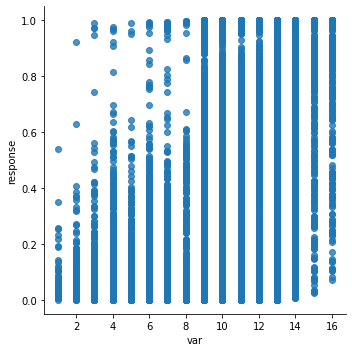

In [88]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [89]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

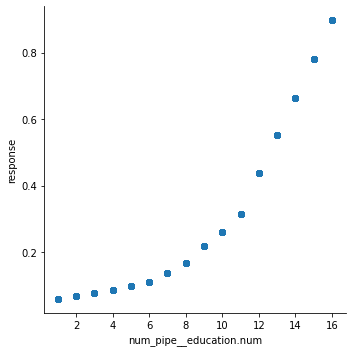

In [90]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

## ExtraTrees



In [91]:
from sklearn.ensemble import ExtraTreesClassifier

In [92]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [93]:
clf=ExtraTreesClassifier()

In [94]:
n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [5, 10, 20, 25, 30, 35],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 1000]},
                   scoring='roc_auc', verbose=20)

In [95]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.91433 (std: 0.00527)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.91318 (std: 0.00491)
Parameters: {'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 50, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.90944 (std: 0.00456)
Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 35, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.90535 (std: 0.00502)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': Tr

In [ ]:
# predictions and all other things follow the exactly same syntax as random forest models